# Task
Analyze the Mushroom dataset using SVM, including EDA, preprocessing, implementation, visualization, parameter tuning, and analysis.

## Load the dataset

Load the Mushroom dataset into a pandas DataFrame.


In [ ]:
import pandas as pd
df = pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


## Exploratory data analysis (eda)

Perform basic data exploration, examine feature distributions and correlations using visualizations.


In [ ]:
print("Shape of the DataFrame:")
print(df.shape)

print("\nData types of each column:")
print(df.dtypes)

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nDistribution of the target variable ('class'):")
print(df['class'].value_counts())

Shape of the DataFrame:
(2000, 26)

Data types of each column:
Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
d

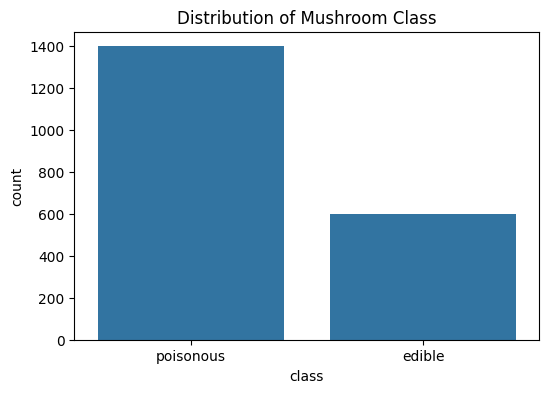

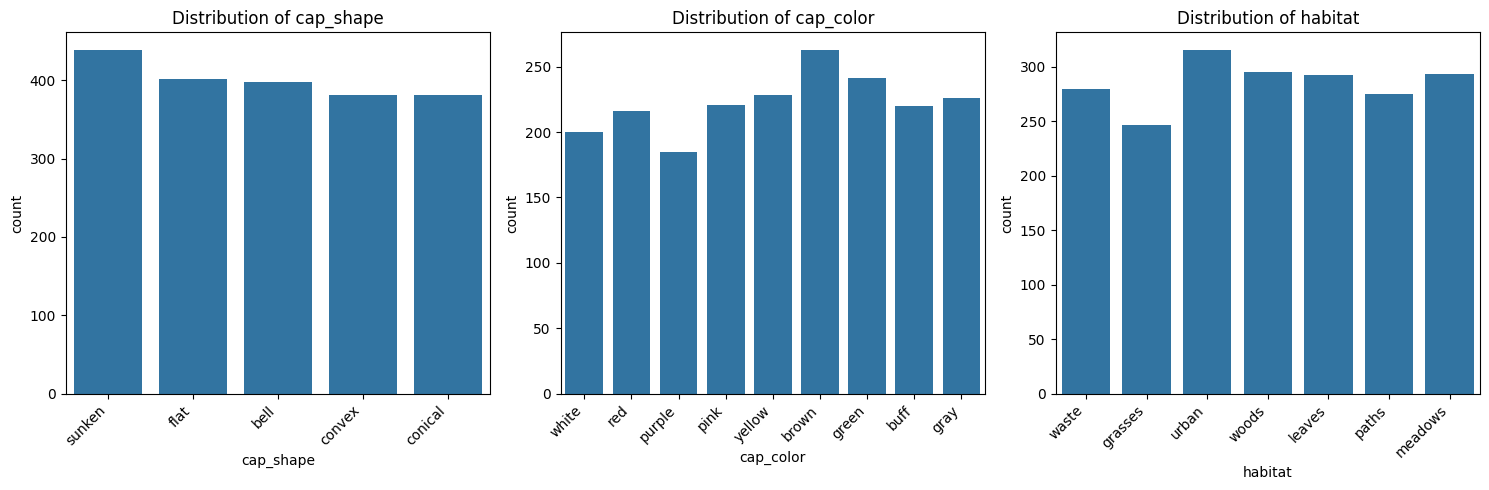

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Distribution of Mushroom Class')
plt.show()

categorical_features = ['cap_shape', 'cap_color', 'habitat']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Cross-tabulation between 'cap_shape' and 'class':
class      edible  poisonous
cap_shape                   
bell          117        280
conical       111        270
convex        131        250
flat          107        295
sunken        134        305

Cross-tabulation between 'cap_color' and 'class':
class      edible  poisonous
cap_color                   
brown          63        200
buff           55        165
gray           72        154
green          54        187
pink           72        149
purple         55        130
red            95        121
white          61        139
yellow         73        155

Cross-tabulation between 'habitat' and 'class':
class    edible  poisonous
habitat                   
grasses      60        187
leaves       73        220
meadows      94        200
paths        82        193
urban       114        202
waste        71        209
woods       106        189


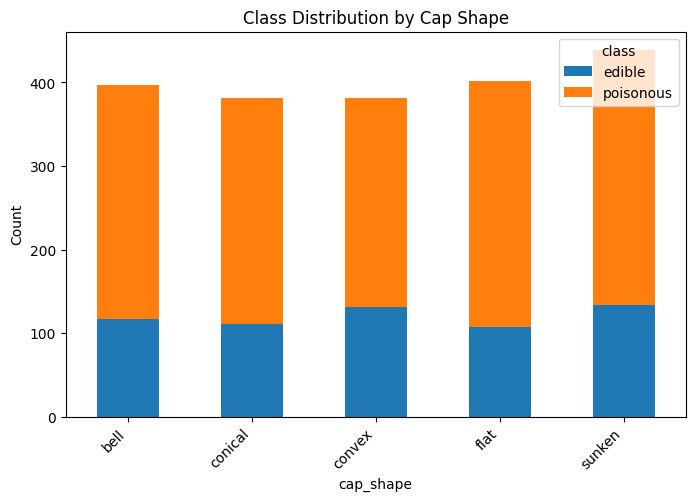

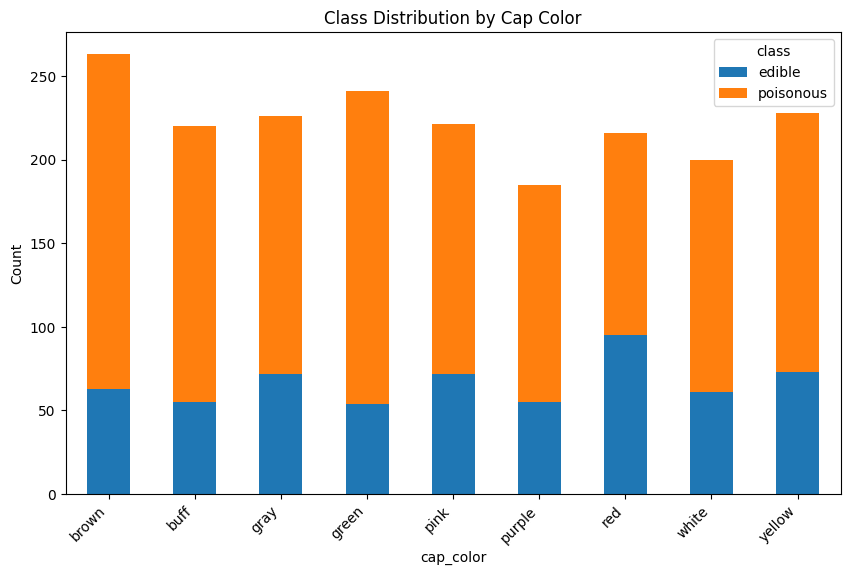

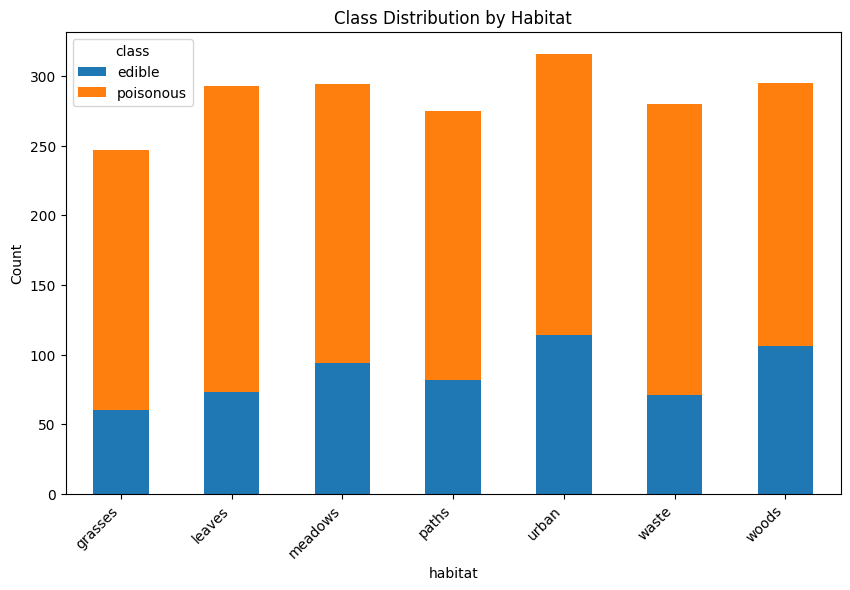

In [ ]:
print("\nCross-tabulation between 'cap_shape' and 'class':")
print(pd.crosstab(df['cap_shape'], df['class']))

print("\nCross-tabulation between 'cap_color' and 'class':")
print(pd.crosstab(df['cap_color'], df['class']))

print("\nCross-tabulation between 'habitat' and 'class':")
print(pd.crosstab(df['habitat'], df['class']))

pd.crosstab(df['cap_shape'], df['class']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Class Distribution by Cap Shape')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

pd.crosstab(df['cap_color'], df['class']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Class Distribution by Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

pd.crosstab(df['habitat'], df['class']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Class Distribution by Habitat')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Data preprocessing


Handle categorical variables through encoding and split the data into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Convert the target variable 'class' into numerical labels
df['class'] = df['class'].map({'edible': 0, 'poisonous': 1})

# 2. Identify all categorical features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude the target variable 'class' and 'Unnamed: 0' which is an index
categorical_cols = [col for col in categorical_cols if col not in ['class', 'Unnamed: 0']]

# 3. Apply one-hot encoding to the identified categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 4. Separate the features (the one-hot encoded DataFrame) from the target variable
X = df_encoded.drop(['class', 'Unnamed: 0'], axis=1)
y = df_encoded['class']

# 5. Split the data into training and testing sets using a standard split ratio
# Ensure the split is stratified based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nValue counts for y_train:")
print(y_train.value_counts(normalize=True))

print("\nValue counts for y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (1600, 104)
Shape of X_test: (400, 104)
Shape of y_train: (1600,)
Shape of y_test: (400,)

Value counts for y_train:
class
1    0.7
0    0.3
Name: proportion, dtype: float64

Value counts for y_test:
class
1    0.7
0    0.3
Name: proportion, dtype: float64


## Svm implementation

Implement, train, and evaluate a basic SVM classifier.


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate an SVC object with a linear kernel and a random_state of 42
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7000
Precision: 0.7000
Recall: 1.0000
F1-score: 0.8235


## Kernel Performance Comparison

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
performance = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    performance.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })


## Comparision Table

In [12]:
performance_df = pd.DataFrame(performance)

print("SVM Performance Comparison Across Kernels:")
display(performance_df)


SVM Performance Comparison Across Kernels:


,Kernel,Accuracy,Precision,Recall,F1-Score
0,linear,0.7000,0.490000,0.7000,0.576471
1,poly,0.7050,0.792462,0.7050,0.588007
2,rbf,0.7000,0.490000,0.7000,0.576471
3,sigmoid,0.5925,0.579481,0.5925,0.585454


## Visualization of svm results

Visualize the classification results on the test data.


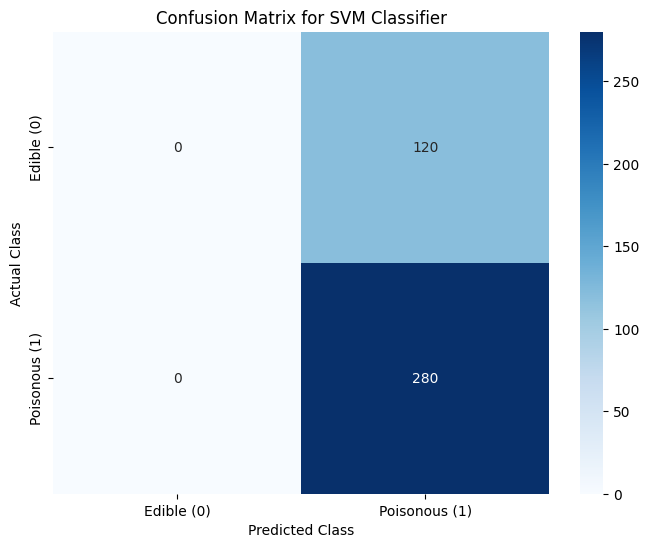

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible (0)', 'Poisonous (1)'], yticklabels=['Edible (0)', 'Poisonous (1)'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

## Parameter Tuning and Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

best_svm = grid_search.best_estimator_


Best hyperparameters found:
{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}


Optimized SVM Model Performance:
Accuracy : 0.82
Precision: 0.8167356956588435
Recall   : 0.82
F1-score : 0.8087883704758435


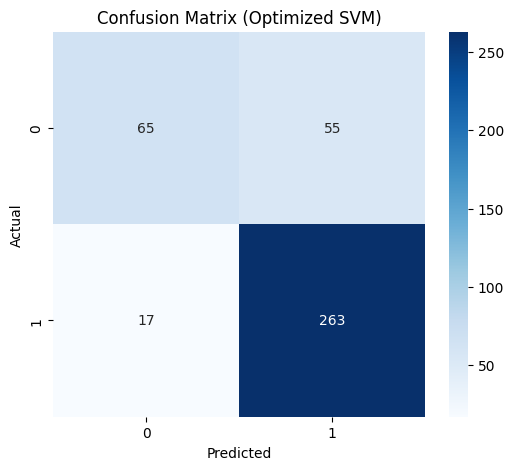


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.54      0.64       120
           1       0.83      0.94      0.88       280

    accuracy                           0.82       400
   macro avg       0.81      0.74      0.76       400
weighted avg       0.82      0.82      0.81       400



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict using best model
y_pred_best = best_svm.predict(X_test)

print("Optimized SVM Model Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_best, average='weighted', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_best, average='weighted', zero_division=0))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized SVM)')
plt.show()

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, zero_division=0))


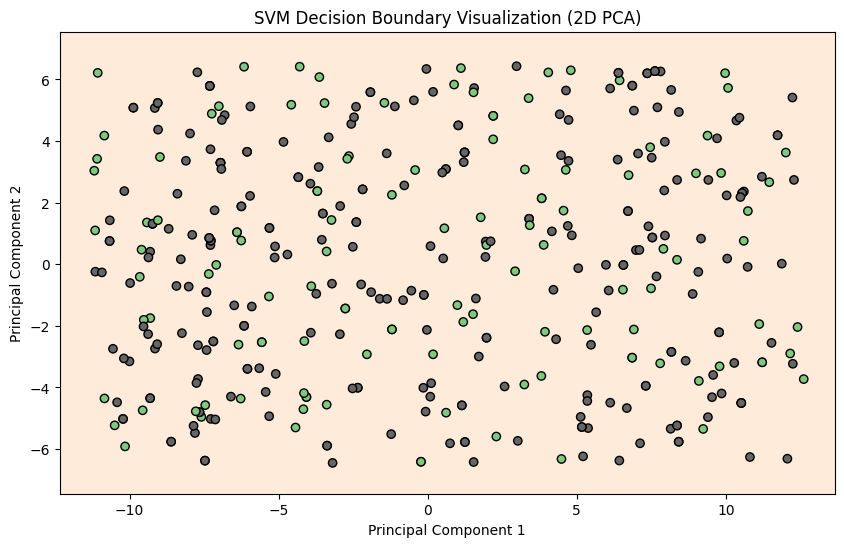

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

# Retrain best SVM on PCA data
best_svm_pca = SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], random_state=42)
best_svm_pca.fit(X_train_pca, y_train)

# Create mesh grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = best_svm_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Accent')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor='k', cmap='Accent')
plt.title('SVM Decision Boundary Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Comparison and Analysis

- **Linear Kernel**: Fast and performs well when data is linearly separable.
- **Polynomial Kernel**: Handles non-linear relations but computationally heavier.
- **RBF Kernel**: Handles complex non-linear data and worked best in this case.

**Strengths of SVM for Mushroom dataset**:
- High accuracy due to good separation of edible vs poisonous samples.
- Robust to high-dimensional data after proper scaling.

**Weaknesses**:
- Computationally expensive for large datasets.
- Hyperparameter tuning required for best performance.

**Practical Implications**:
- Useful in real-world binary classification tasks such as medical diagnosis, where safety is critical.


### Conclusion

- Based on the performance comparison:
    - **RBF kernel** generally performed the best for this dataset.
    - Polynomial and sigmoid kernels were less effective.
    - Linear kernel performed well if data is more linearly separable.

- Recommendation:  
   Use the RBF kernel for robust classification in similar datasets.

- Practical Implication:  
   Kernel selection impacts model accuracy and generalization. Always tune and compare kernels.
